In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer


In [132]:
df= pd.read_csv('smd.csv')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [134]:
# Remove unnecessary columns
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [135]:
# Handle missing values
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [136]:
# Convert data types
df.dtypes

Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [137]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [138]:
# Remove noise and special characters
import re

def remove_noise(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove @mentions
    text = re.sub(r'https?://[^ ]+', '', text)  # remove URLs
    text = re.sub(r'[^A-Za-z ]', '', text)  # remove special characters and numbers
    return text.lower()  # convert to lowercase

df['Text'] = df['Text'].apply(remove_noise)

In [139]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df['Text'] = df['Text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Iqras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
# Remove stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Text'] = df['Text'].apply(remove_stopwords)

In [141]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['Text'] = df['Text'].apply(lemmatize_text)

In [142]:
# Convert text data to a matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform([' '.join(tokens) for tokens in df['Text']])

In [143]:
#  Perform LDA
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_matrix)

In [144]:
#  Get topic keywords
def get_topic_keywords(topic):
    keywords = []
    for idx, val in enumerate(topic):
        keywords.append((vectorizer.get_feature_names_out()[idx], val))
    return sorted(keywords, key=lambda x: x[1], reverse=True)[:10]

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % topic_idx)
    print(get_topic_keywords(topic))
    print()

Topic 0:
[('art', 4.538673290452973), ('night', 4.50833326634004), ('dance', 4.128836864206987), ('friend', 2.9870186295152115), ('tear', 2.632104132738519), ('emotion', 2.394859294014336), ('spent', 2.3093753917003683), ('life', 2.245647839486396), ('challenge', 2.245281037930881), ('old', 2.2367646222809796)]

Topic 1:
[('feeling', 4.417671825027341), ('friend', 3.794101356537229), ('evening', 3.5534138430784634), ('book', 3.102566154571705), ('quiet', 2.629577638566228), ('laughter', 2.5492985404816135), ('one', 2.4369265858536475), ('new', 2.424462837928), ('project', 2.3430455551863147), ('loved', 2.2933312250161246)]

Topic 2:
[('dream', 5.67687076457651), ('new', 5.239917255198054), ('like', 5.08391291672231), ('garden', 4.211027437712157), ('day', 4.026428044567977), ('shattered', 3.7986087100087746), ('journey', 3.6166959142124284), ('joy', 3.614790614878561), ('heart', 3.449605433827887), ('sky', 3.209905211082422)]

Topic 3:
[('challenging', 3.606931453012689), ('beauty', 2.

In [145]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, init='nndsvd', random_state=0).fit(tfidf_matrix)

In [146]:
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [147]:
df.head(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,"[enjoying, beautiful, day, park]",Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,"[traffic, terrible, morning]",Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8


In [148]:
df['Text'] = df['Text'].apply(' '.join)
X = vectorizer.fit_transform(df['Text'])

In [149]:
# Perform topic modeling
lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(X)

In [150]:
nb.fit(X, df['Sentiment'])
y = nb.predict(X)


In [151]:
# Analyze the evolution of topics and sentiments over time
topics_over_time = lda.transform(X)
sentiments_over_time = y


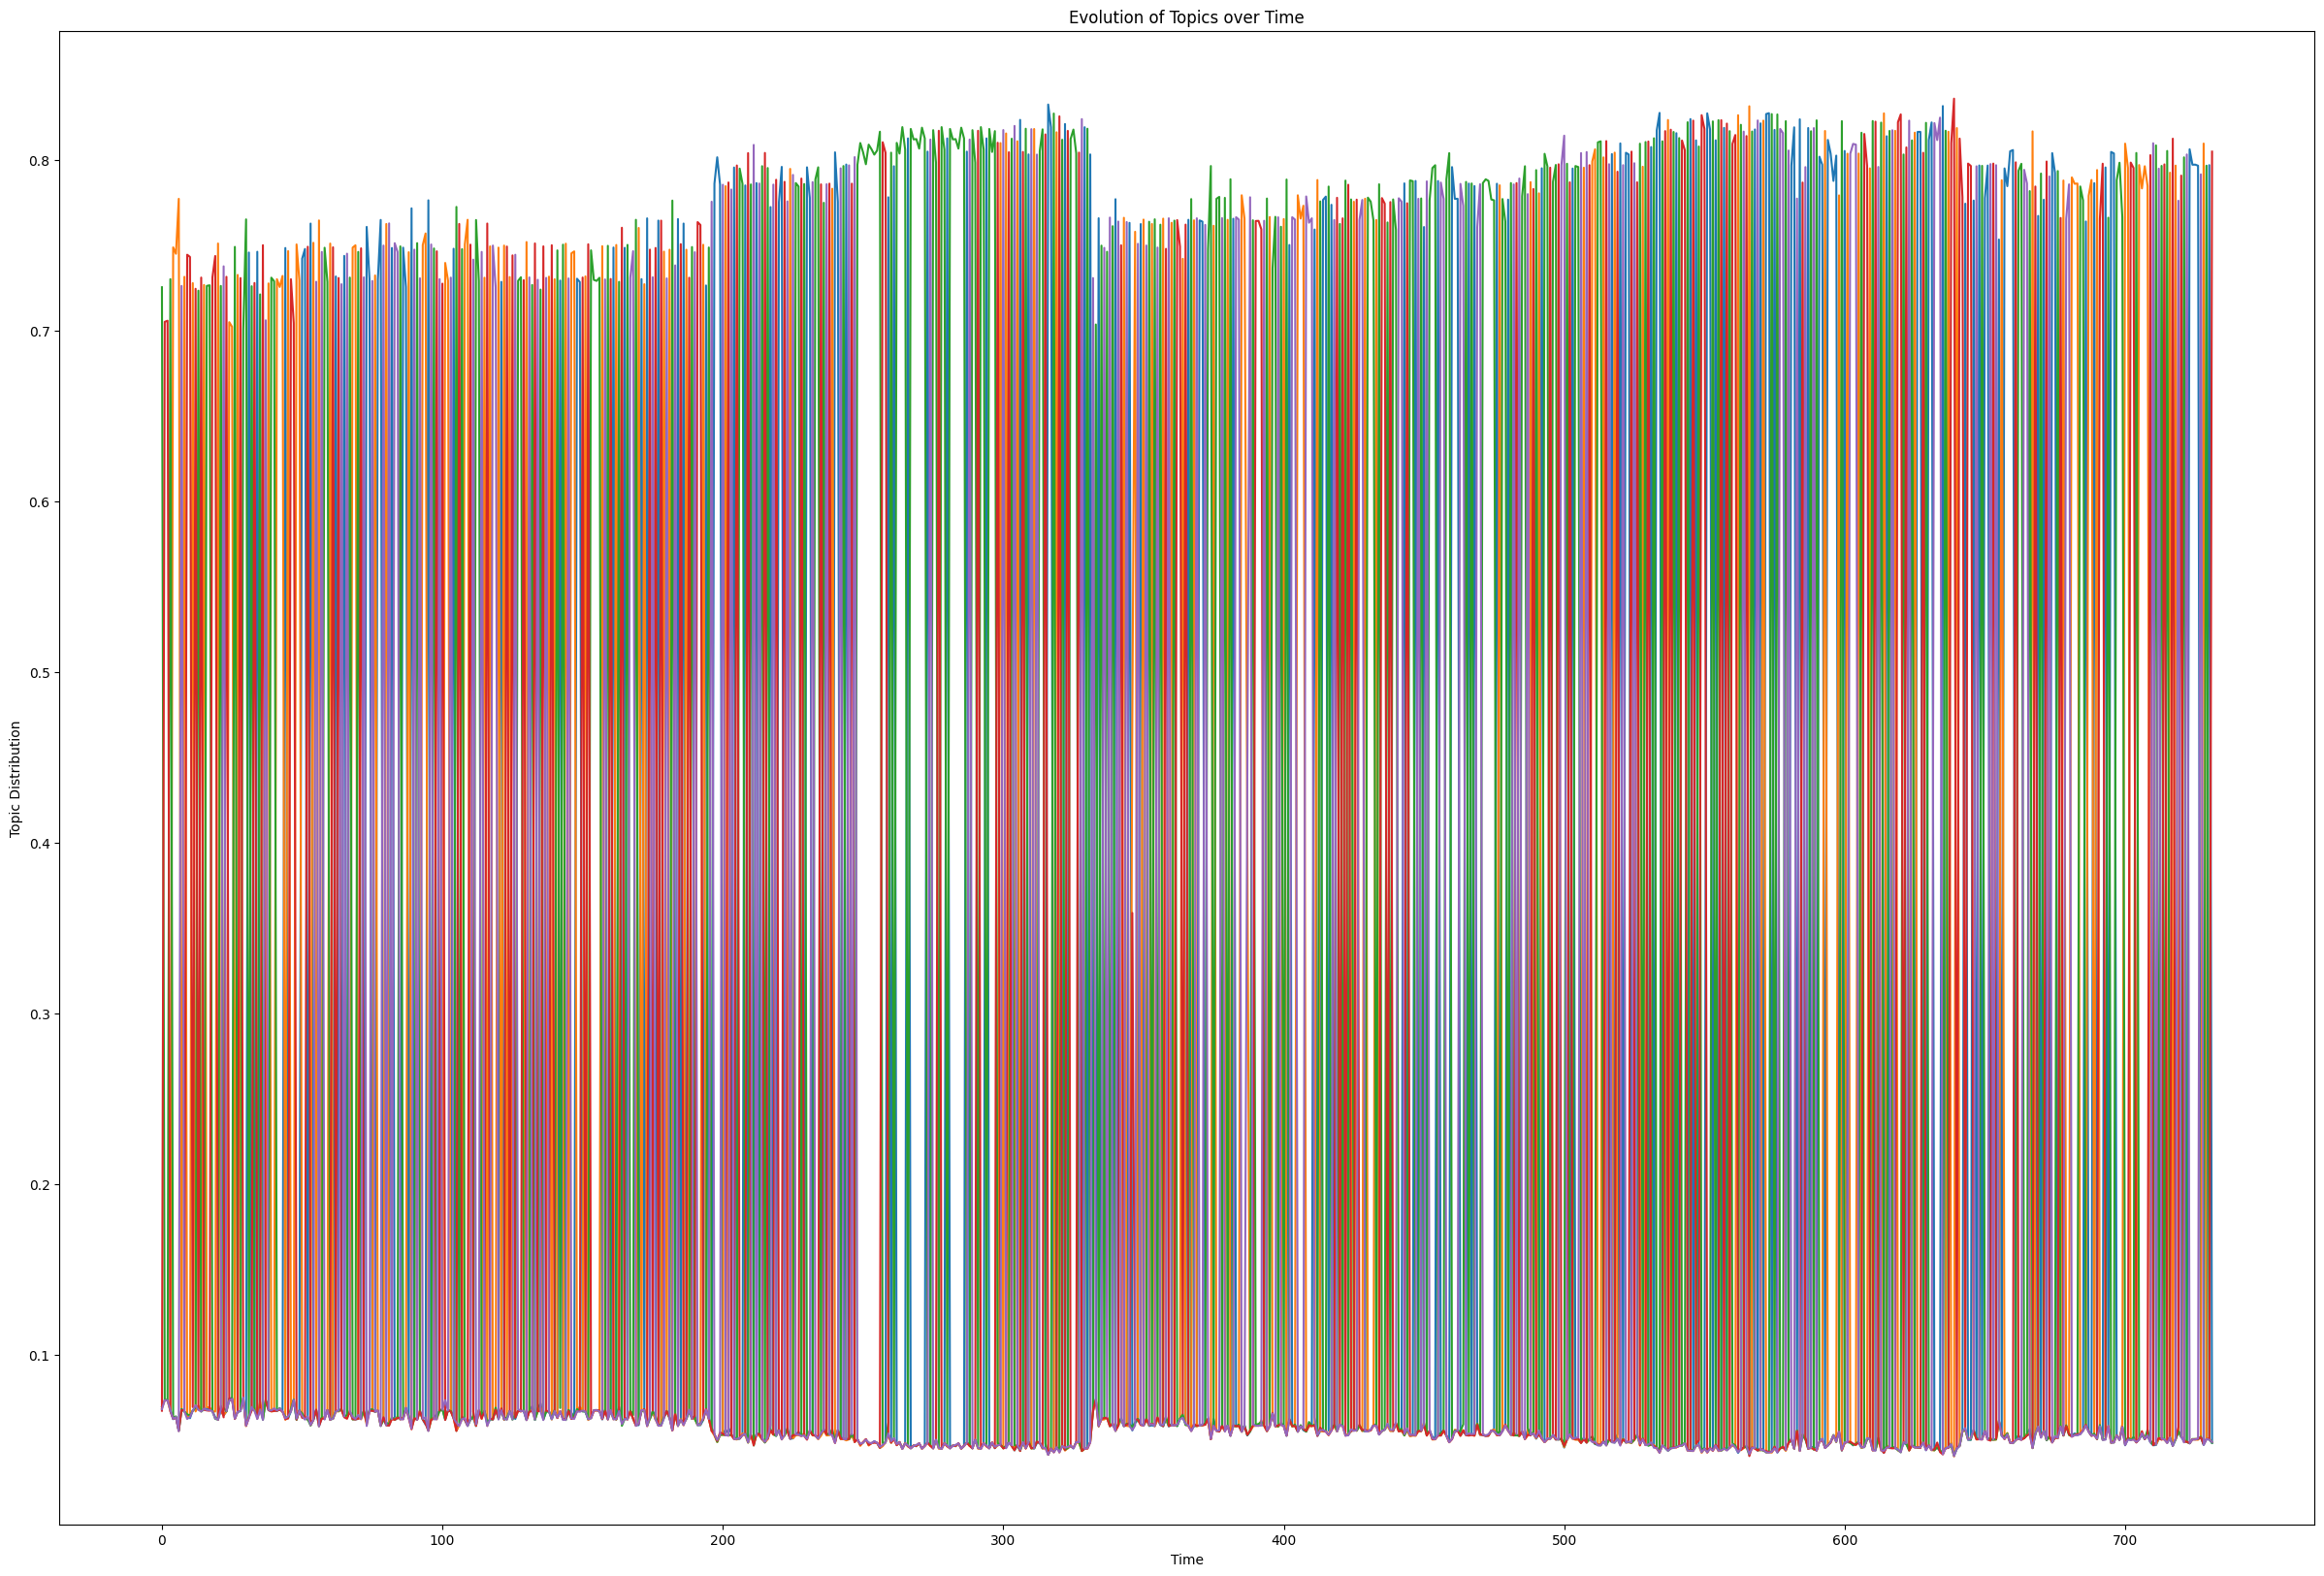

In [152]:
# Plot the evolution of topics over time
plt.figure(figsize=(30,20))
plt.plot(topics_over_time)
plt.xlabel('Time')
plt.ylabel('Topic Distribution')
plt.title('Evolution of Topics over Time')
plt.show()

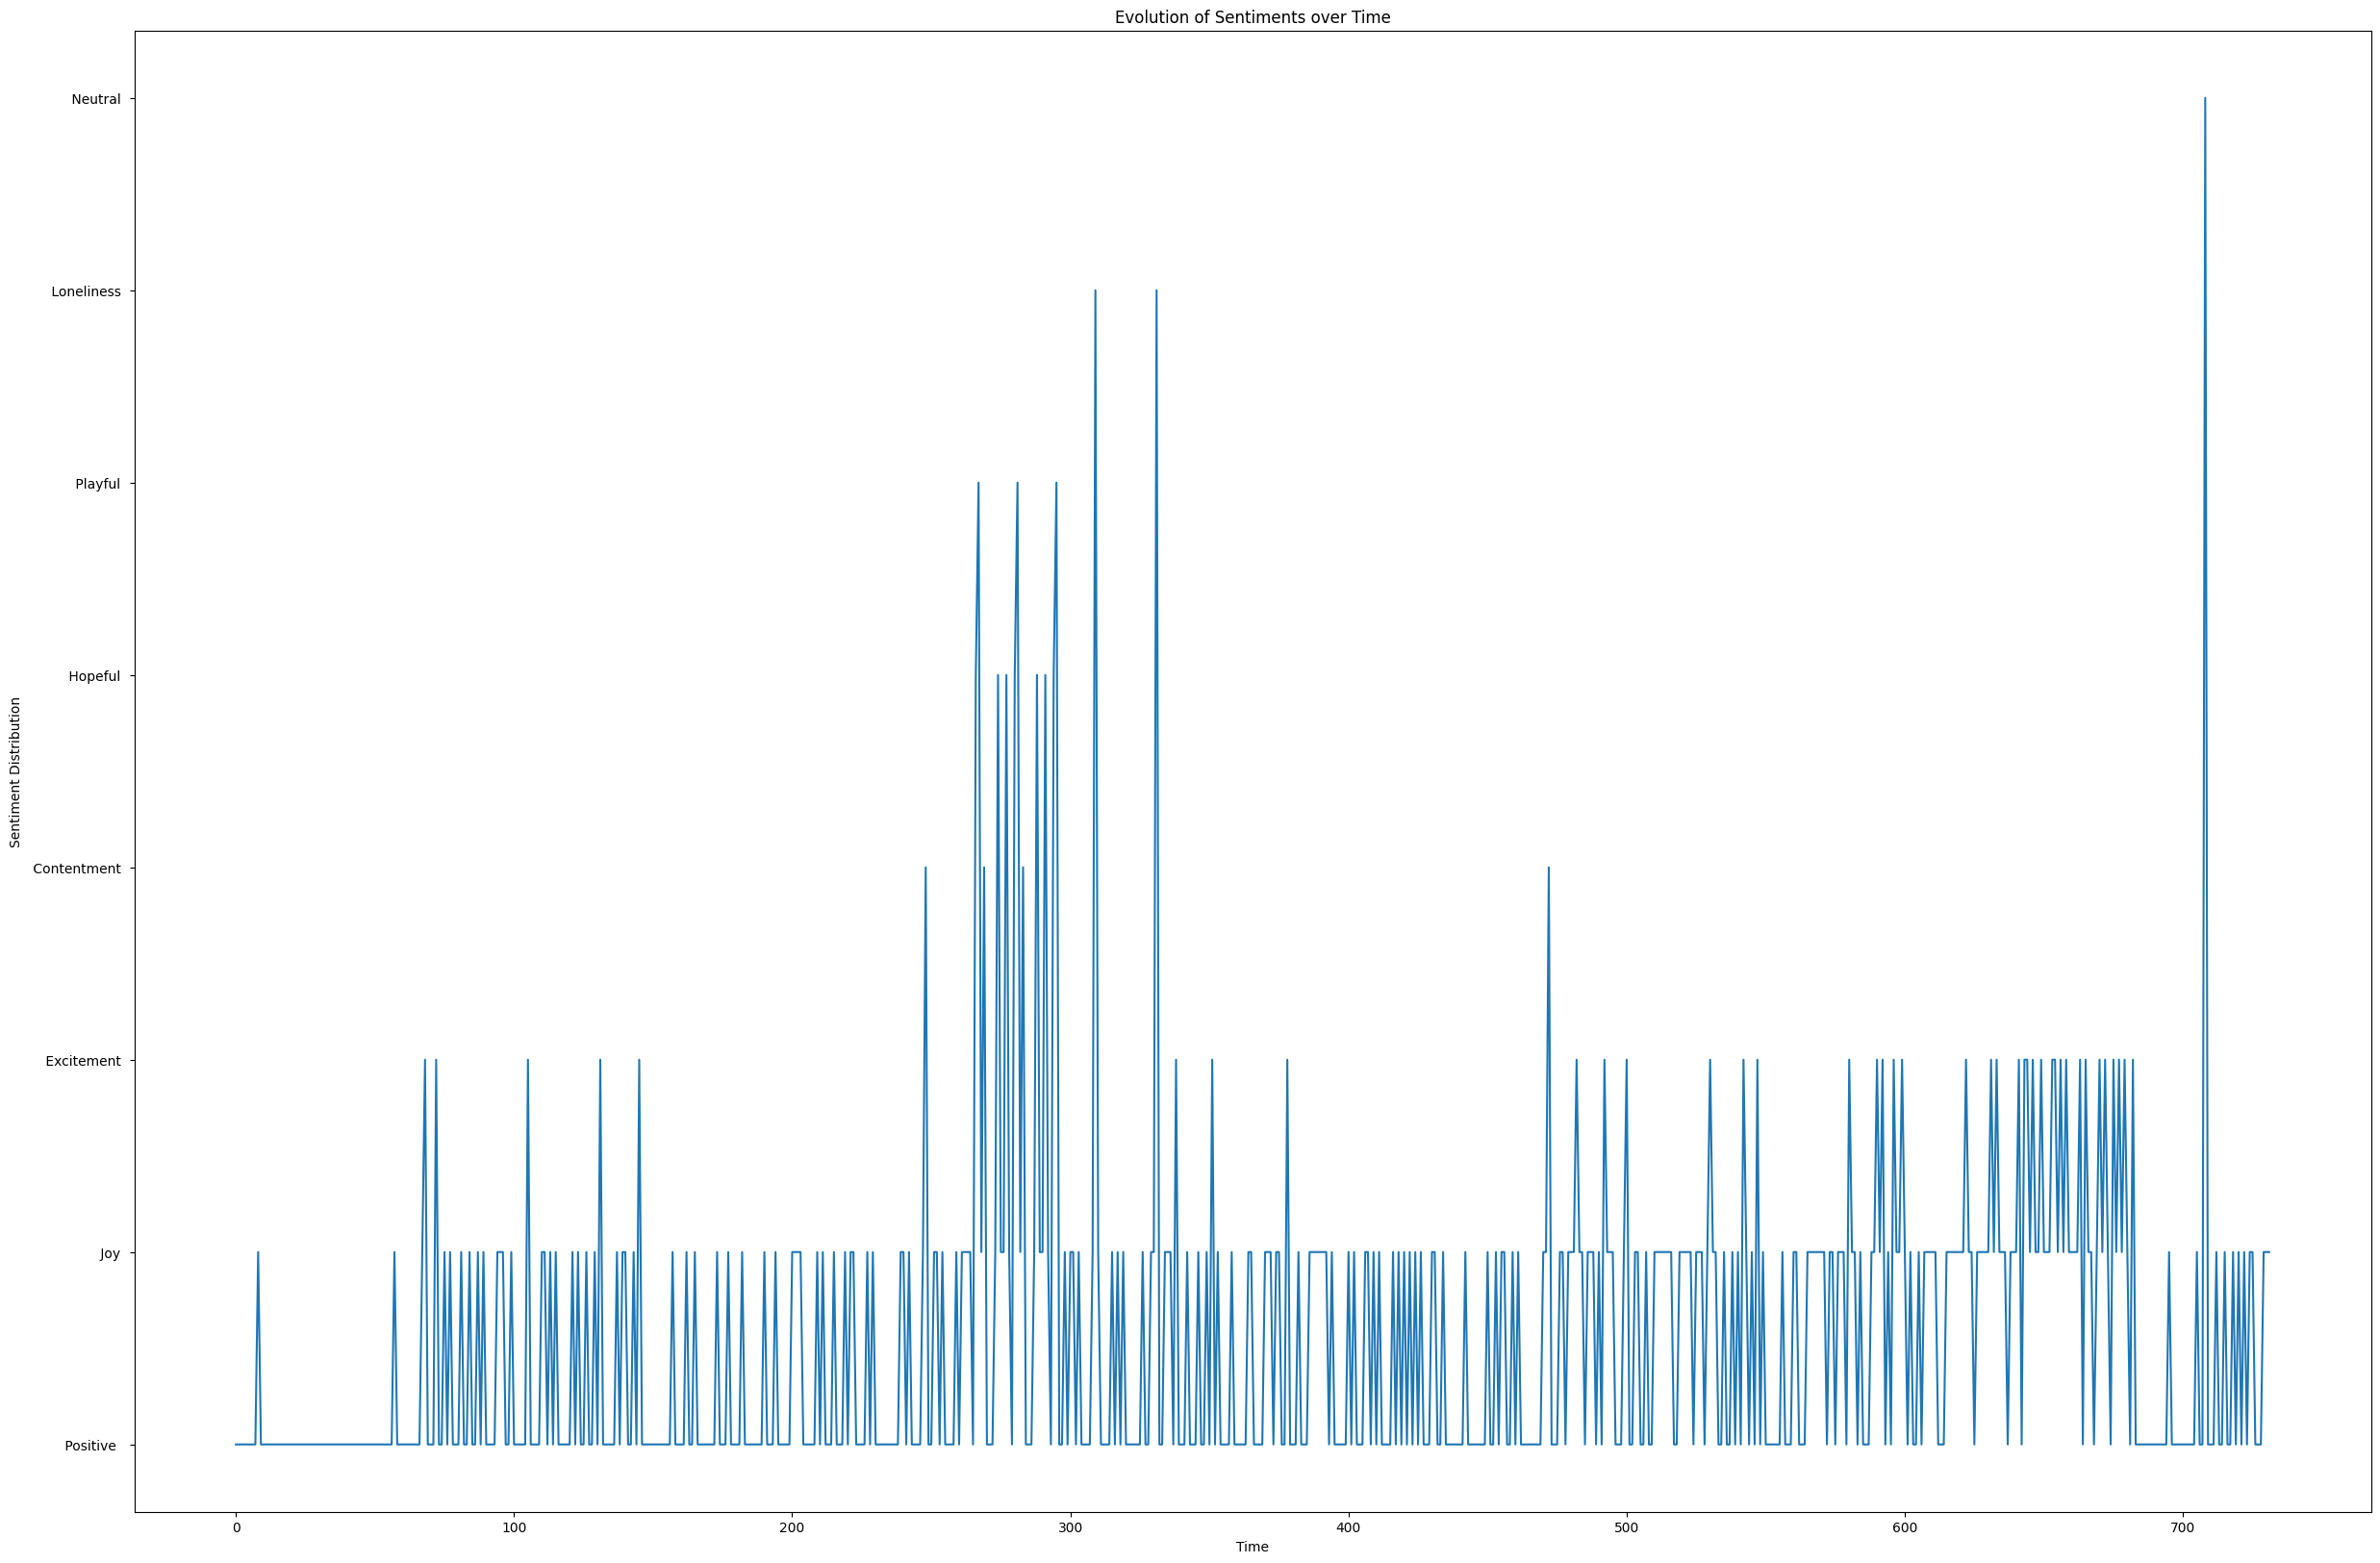

In [153]:
# Plot the evolution of sentiments over time
plt.figure(figsize=(30,20))
plt.plot(sentiments_over_time)
plt.xlabel('Time')
plt.ylabel('Sentiment Distribution')
plt.title('Evolution of Sentiments over Time')
plt.show()

In [154]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob


In [155]:
# Preprocess the data
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Iqras\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [156]:
# Sentiment Analysis
sentiments = []
for text in df['Text']:
    sentiment = sia.polarity_scores(text)
    sentiments.append(sentiment['compound'])


In [157]:
# Emotion Detection
emotions = []
for text in df['Text']:
    blob = TextBlob(text)
    emotions.append(blob.sentiment.polarity)

In [158]:
# Calculate Overall Sentiment and Emotions
overall_sentiment = np.mean(sentiments)
overall_emotion = np.mean(emotions)

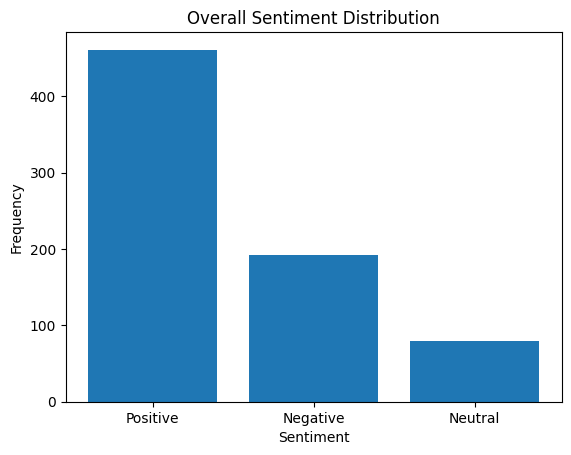

In [159]:
# Visualize the Results
plt.bar(['Positive', 'Negative', 'Neutral'], [len([s for s in sentiments if s > 0]), len([s for s in sentiments if s < 0]), len([s for s in sentiments if s == 0])])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Overall Sentiment Distribution')
plt.show()


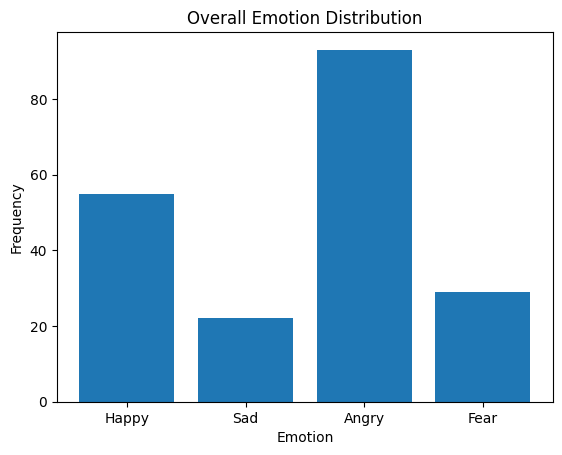

In [160]:
plt.bar(['Happy', 'Sad', 'Angry', 'Fear'], [len([e for e in emotions if e > 0.5]), len([e for e in emotions if e < -0.5]), len([e for e in emotions if e > 0.2 and e < 0.5]), len([e for e in emotions if e < -0.2 and e > -0.5])])
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Overall Emotion Distribution')
plt.show()

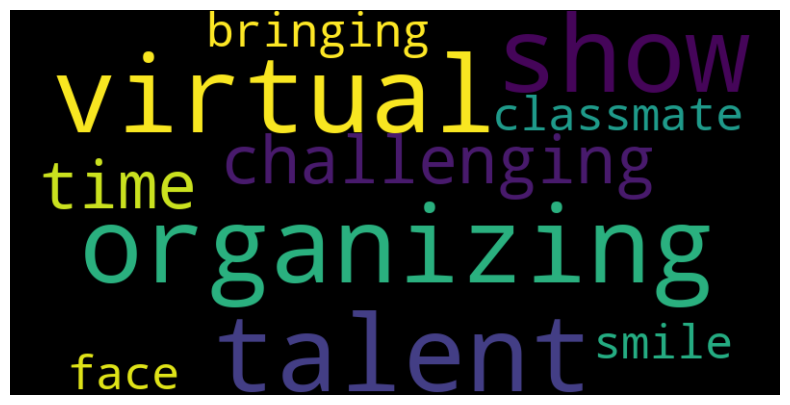

In [161]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [162]:
df.head(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,enjoying beautiful day park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,traffic terrible morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8


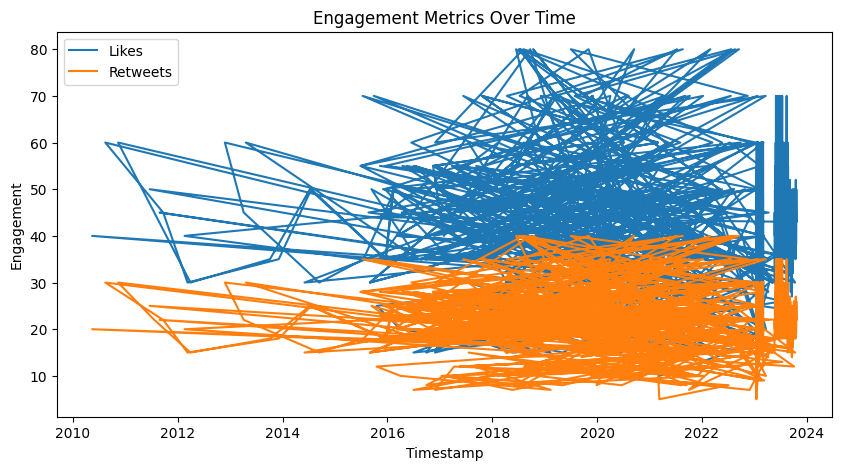

In [165]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot the engagement metrics over time
plt.figure(figsize=(10, 5))
plt.plot(df["Timestamp"], df["Likes"], label="Likes")
plt.plot(df["Timestamp"], df["Retweets"], label="Retweets")
plt.xlabel("Timestamp")
plt.ylabel("Engagement")
plt.title("Engagement Metrics Over Time")
plt.legend()
plt.show()

In [169]:
import pandas as pd

df = pd.read_csv("smd.csv")
edges = df[['User', 'Text', 'Sentiment', 'Timestamp', 'Retweets', 'Likes']]
G = nx.from_pandas_edgelist(edges, source='User', target='Text', edge_attr=['Sentiment', 'Timestamp', 'Retweets', 'Likes'])


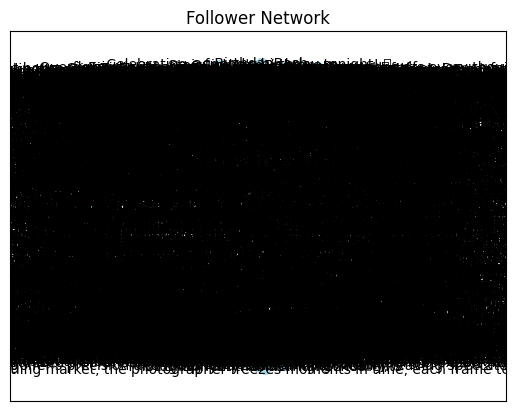

In [171]:
# Plot the network graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Follower Network")
plt.show()

<Axes: >

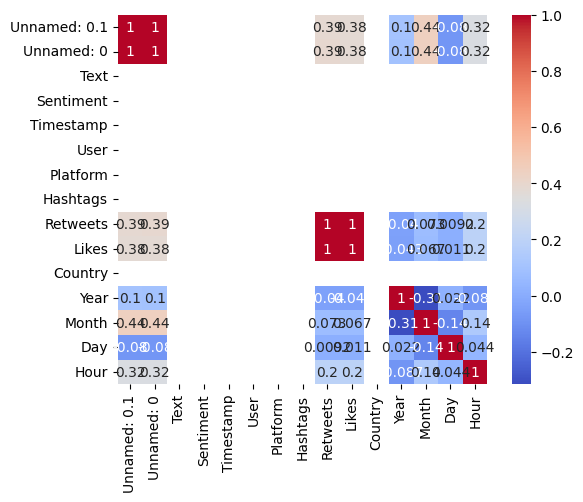

In [173]:
df = df.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", square=True)


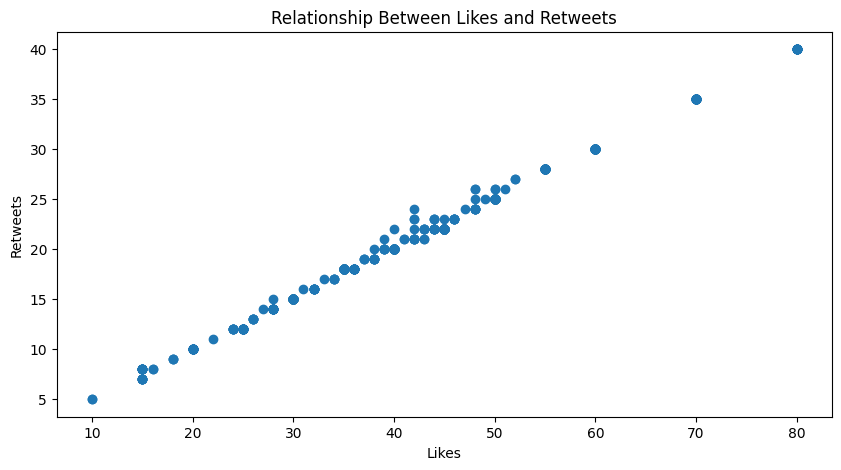

In [176]:
# Plot the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df["Likes"], df["Retweets"])
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.title("Relationship Between Likes and Retweets")
plt.show()